<a href="https://colab.research.google.com/github/prajwalmadankar0/Sentimental-Analysis-of-Moive-Review-/blob/main/Sentiment_Analysis_Movie_review_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(r"/content/drive/MyDrive/Big Data Analytics/IMDB Dataset 10000.csv")

In [ ]:
dataset.head(5)

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...   
1   A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                           I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                             Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shot

In [ ]:
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','', text) #removes @mentions
    text=re.sub(r'#','',text) #removes hastags
    text=re.sub(r'RT[\s]+','',text) #removes Retweets
    text=re.sub(r'https?:\/\/\S+','',text) #removes the hyperlink
    text=re.sub(r'-','',text) #removes the hyperlink
    text=re.sub(r'_','',text) #removes the hyperlink
    text=re.sub(r':','',text) #removes the hyperlink
    text=re.sub(r',','',text) #removes the hyperlink
    text=re.sub(r'<','',text) #removes the hyperlink
    text=re.sub(r'>','',text) #removes the hyperlink
    text=re.sub(r'/','',text) #removes the hyperlink
    return text

#cleaning the text
dataset['review']=dataset['review'].apply(cleantxt)


#showing cleaned text
dataset

review  \
0     One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                                  A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                                  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                      Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As

In [ ]:
print(len(dataset.columns))

2


In [ ]:
# Create a function to get the subjectivity - it converts human text into machine text to understand text itself into 0.0 to 1.0
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get the polarity - it converts a value into float and adjust value between -1 to 1.
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
dataset['Subjectivity']=dataset['review'].apply(getsubjectivity)
dataset['Polarity']=dataset['review'].apply(getpolarity)

#show the new data frame with new columns
dataset

review  \
0     One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                                  A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                                  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                      Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As

In [ ]:
def getanalysis( score):


  # set sentiment
  if score > 0:
    return 'positive'
  elif score== 0:
    return 'neutral'
  else:
    return 'negative'

dataset['Sentiment']=dataset['Polarity'].apply(getanalysis)

In [ ]:
dataset

review  \
0     One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                                  A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                                  I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                      Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As

In [ ]:
#print all of the positive tweets
j=1
sortedDF=dataset.sort_values(by=['Polarity'])

for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Sentiment'][i]=="positive"):
        print(str(j)+')'+sortedDF['review'][i])
        print()
        j=j+1

1)One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other show

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




6193)this is film is probably one of the best i've seen so far. i would put it only second to All About Lily Chouchou because it kind of gives me the same vibes....'9 souls' is about 9 prisoners who have just escaped prison to go and find some counterfeit money stored in a time capsule at Mount Fuji Primary School. they later find out that there wasn't much there and set off on their own ways. the first half of the movie is just a time for the characters to be introduced and for the main points to be stated. it is a comedic yet serious part of the journey. the second half moved me to tears. as the movie progresses each character goes and tries to fulfill their dreams but unfortunately ending somewhat badly. in the end only 2 of the 9 escapees are left. the way that each character left the scene was very sad and you will probably feel tears in your eyes. a beautiful film directed fantastically. this is a movie for people who have enjoyed Toshiaki Toyoda's other films such as 'Blue Spri

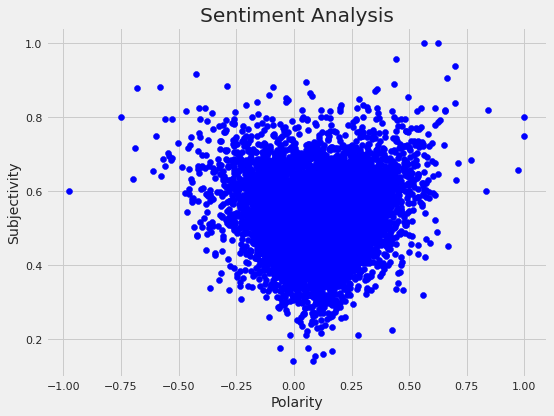

In [ ]:
#Plot the Polarity and Subjectivity

plt.figure(figsize=(8,6))
for i in range(0,dataset.shape[0]):
    plt.scatter(dataset['Polarity'][i],dataset['Subjectivity'][i], color='Blue')


plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

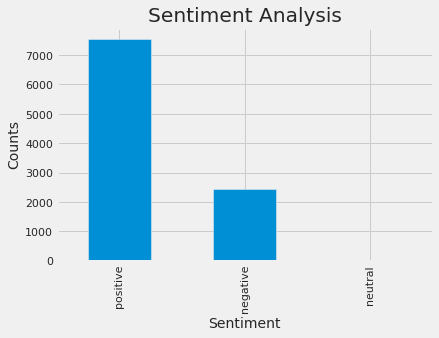

In [ ]:
#show value counts
dataset['Sentiment'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#dataset['Polarity'] = dataset['review'].apply(lambda s: TextBlob(s).sentiment.polarity)
# Predict sentiment label for each review
dataset['pred_TextBlob'] = dataset['Polarity'].apply(lambda x: 1 if x >=0 else 0)
dataset.head()

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                               A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                               I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                   Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As for the sho

In [ ]:
def getanalysis( score):


  # set sentiment
  if score == 'positive':
    return 1
  elif score== 'neutral':
    return 0
  else:
    return -1

dataset['value']=dataset['sentiment'].apply(getanalysis)

In [ ]:
dataset.head(5)

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                               A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                               I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                   Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As for the sho

In [ ]:
# Compare Actual and Predicted
accuracy_score(dataset['value'],dataset['pred_TextBlob'])

0.4756

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return analyzer.polarity_scores(text)['compound']

In [ ]:
dataset['vadar compound'] = dataset['review'].apply(vadar_sentiment)

In [ ]:
dataset.head(5)

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                               A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                               I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                   Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As for the sho

In [ ]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1)
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

In [ ]:
# new col with vadar sentiment label based on vadar compound score
dataset['vadar sentiment'] = dataset['vadar compound'].apply(categorise_sentiment)

In [ ]:
dataset.head(5)

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                               A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                               I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                   Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As for the sho

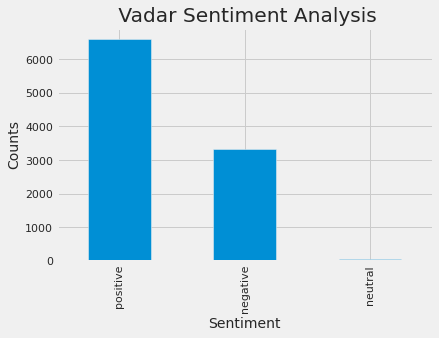

In [ ]:
#show value counts
dataset['vadar sentiment'].value_counts()

#plot and visualize the counts
plt.title(' Vadar Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['vadar sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
dataset.head(5)

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right as this is exactly what happened with me.br br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.br br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.br br I would say the main appeal of the show is due to the fact that it goes where other sh...   
1                               A wonderful little production. br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece. br br The actors are extremely well chosen Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                               I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy. The plot is simplistic but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.br br This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson in this she managed to tone down her "sexy" image and jumped right into a average but spirited young woman.br br This may not be the crown jewel of his career but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                                                   Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.br br This movie is slower than a soap opera... and suddenly Jake decides to become Rambo and kill the zombie.br br OK first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots.br br 3 out of 10 just for the well playing parents & descent dialogs. As for the sho

In [ ]:
# Compare Actual and Predicted
accuracy_score(dataset['sentiment'],dataset['vadar sentiment'])

0.6968

In [ ]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from autoviml.Auto_NLP import Auto_NLP
train, test = train_test_split(dataset, test_size=0.3)

In [ ]:
input_feature, target = "review", "sentiment"

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Big Data Analytics/IMDB Dataset 10000.csv")

In [ ]:
data.head(5)

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...   
1   A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                           I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                             Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shot

**AUTO ML - GOOGLE **

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: review
Shape of Train Data: 7000 rows
    Shape of Test Data: 3000 rows


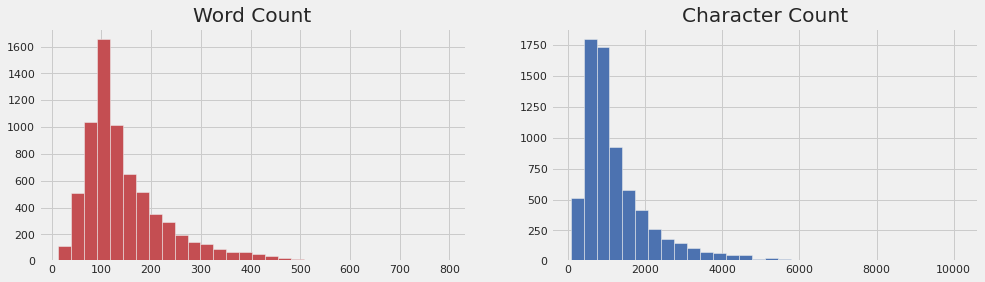

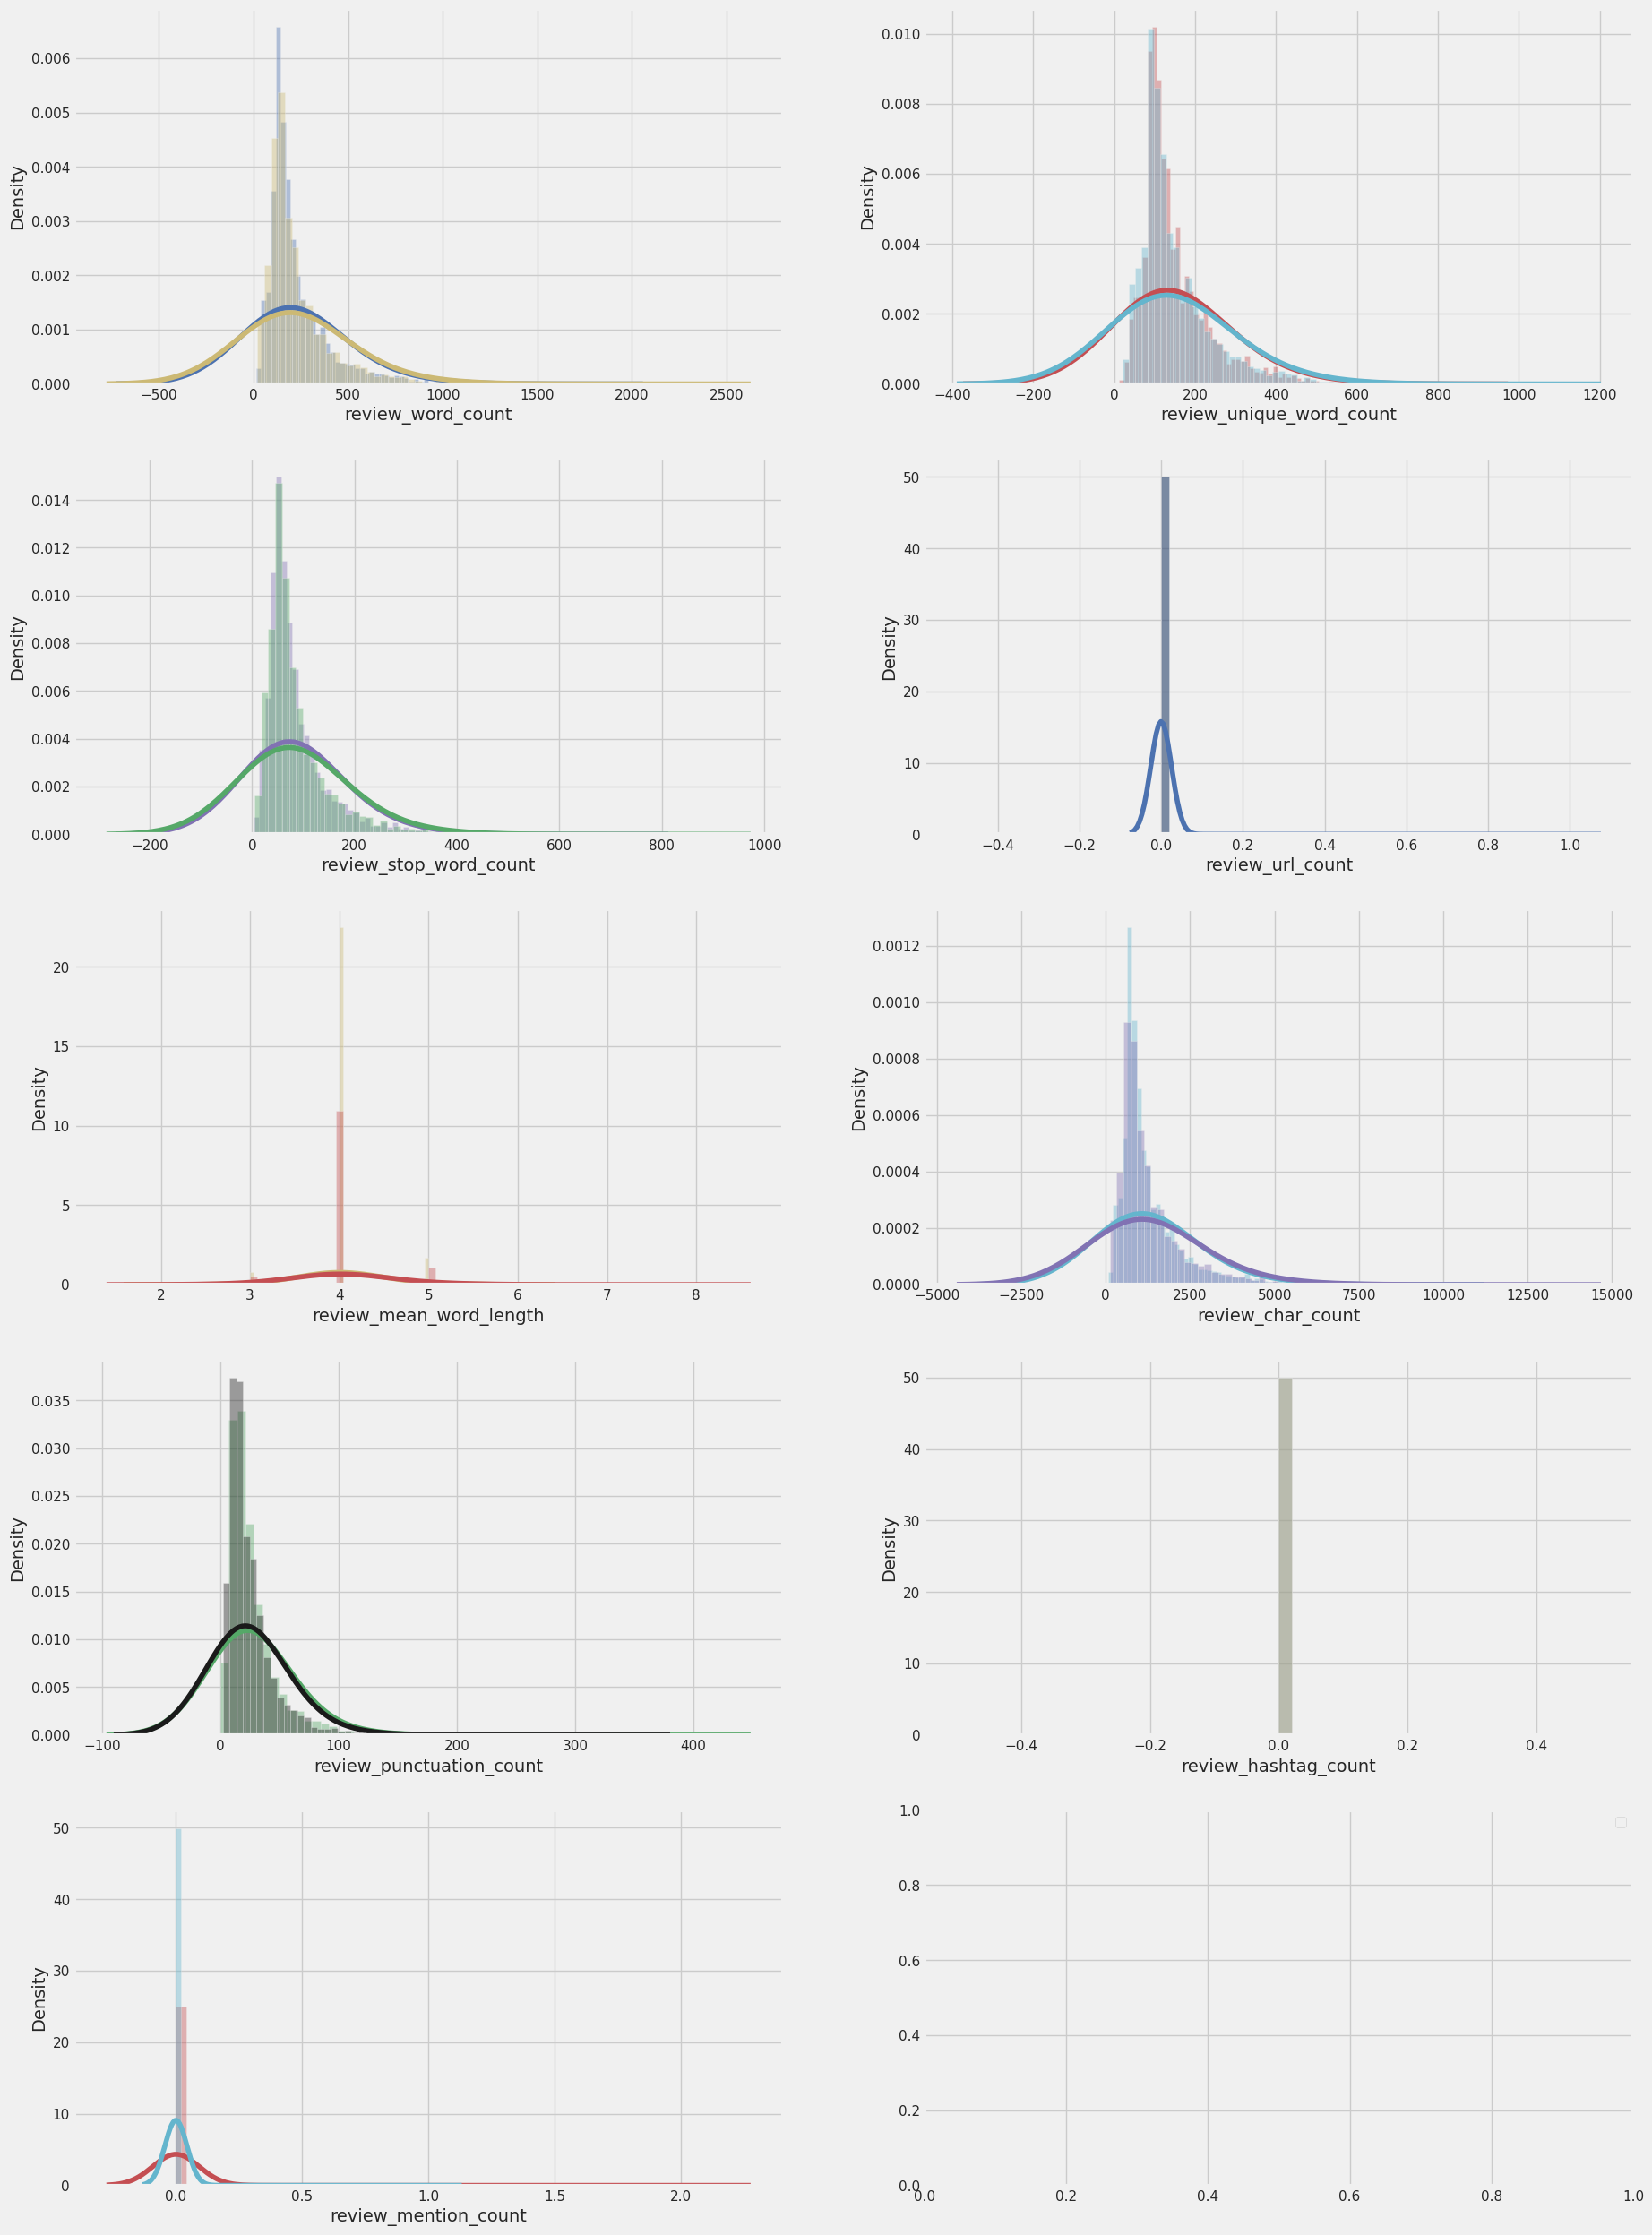

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for review column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 99 seconds
Train data Text cleaning completed. Time taken = 112 seconds

For target = sentiment

    For class = negative
Top 200 n-grams
: []
    Top n-grams that are most frequent in this class are: 0

    For class = positive
Top 200 n-grams
: []
    Top n-grams that are most frequent in this class are: 0
Time Taken = 4 seconds
##################    THIS IS FOR BUILD_MODEL = TRUE           #################
Building Model and Pipeline for NLP column = review. This will take time...
       Class  -> Counts -> Percent
    negative:    3482  ->   49.7%
    positive:    3518  ->   50.3%
    Selected the maximum number of features limit = 5000
Performing Rando

TypeError: ignored

In [ ]:
train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,score_type="balanced_accuracy",top_num_features=100,modeltype="Classification", verbose=2, build_model=True)


In [ ]:
final.predict(test_x[input_feature])